In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Project_3.csv
./Project_3.ipynb
./.ipynb_checkpoints/Project_3-checkpoint.ipynb
./.ipynb_checkpoints/Project_3-checkpoint.csv
./data/hello
./data/.ipynb_checkpoints/hello-checkpoint


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [ ]:
#Create an ml model that predicts whether a consumer would buy a cog

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [3]:
#Recieved and read the data from the csv file using pandas
data = pd.read_csv("Project_3.csv")
data.head()

,User ID,name,Gender,Age,EstimatedSalary,Purchased
0,10000,Billy Chavez,Male,33,75787,0
1,10001,Tyler Scott,Female,25,34033,1
2,10002,Clayton Ross,Male,41,61484,1
3,10003,Vernon Lewis,Male,51,121013,0
4,10004,Kaitlin Joseph,Male,44,47272,1


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Men Purchase Rate 0.4446601941747573
Women Purchase Rate 0.42386831275720166


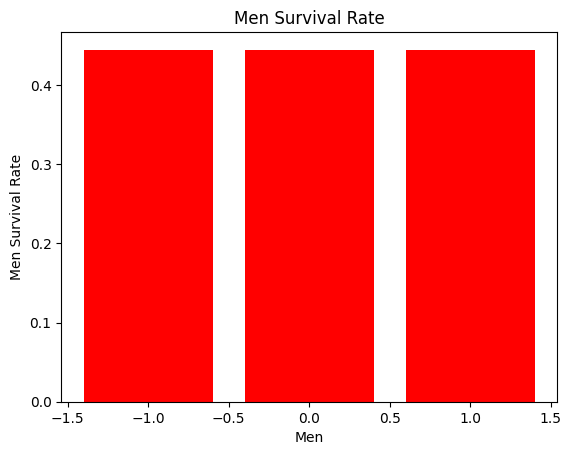

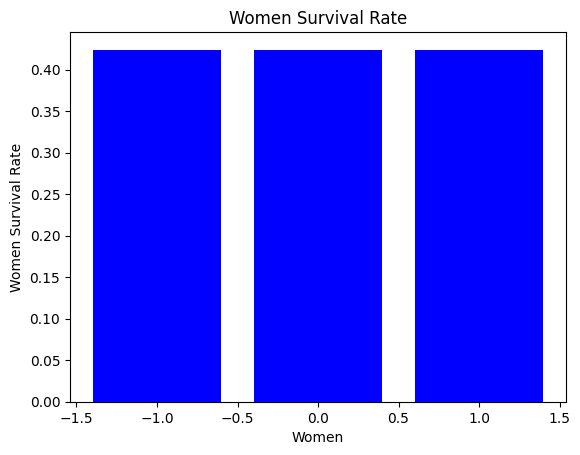

In [116]:
names = data['name']
gender = data['Gender']
age = data['Age']
men = data.loc[data.Gender == 'Male']['Purchased']
menPurchaseRate = sum(men)/len(men)
print("Men Purchase Rate", menPurchaseRate)
women = data.loc[data.Gender == 'Female']['Purchased']
womenPurchaseRate = sum(women)/len(women)
print("Women Purchase Rate", womenPurchaseRate)


plt.bar(men, menPurchaseRate, color = 'red')
plt.title('Men Survival Rate')
plt.xlabel('Men')
plt.ylabel('Men Survival Rate')
plt.show()
plt.bar(women, womenPurchaseRate, color = 'blue')
plt.title('Women Survival Rate')
plt.xlabel('Women')
plt.ylabel('Women Survival Rate')
plt.show()


# 4.Prepare the Data


Apply any data transformations and explain what and why


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 